[Original author](https://designwith.ml/assets/docs/Meetup_clustering_sample)  
  
Clustering meetup.com data! Using the location and group information to cluster the members into 6 clusters - but it is up to you to figure out what they mean!  

Data was on Kaggle.

In [99]:
#these are all of the libraries i'll be using - and I load the groups.csv data
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [100]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [101]:
import pandas as pd

df = pd.read_csv("E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/groups.csv")

# Data Step
This step we're going to look at our dataframes and become familiar with what's in them.

In [102]:
#this is what the groups.csv looks like as a dataframe - it is about the groups
df.head()

group_id  category_id          category.name     category.shortname  \
0      6388           14       health/wellbeing       health-wellbeing   
1      6510            4  community/environment  community-environment   
2      8458           26           pets/animals           pets-animals   
3      8940           29         sci-fi/fantasy         sci-fi-fantasy   
4     10104           26           pets/animals           pets-animals   

   city_id      city country              created  \
0    10001  New York      US  2002-11-21 16:50:46   
1    10001  New York      US  2003-05-20 14:48:54   
2    10001  New York      US  2004-03-27 09:55:41   
3    10001  New York      US  2002-11-16 04:49:16   
4    10001  New York      US  2003-10-22 21:39:49   

                                         description  \
0  Those who practice or hold a strong interest i...   
1  The New York Alternative Energy Meetupis for t...   
2                                          not_found   
3  Welcome to the The New York City Anime Meetup ...   
4  We welcome those who support pits, even if you...   

              group_photo.base_url  ...  \
0  https://secure.meetupstatic.com  ...   
1  https://secure.meetupstatic.com  ...   
2  https://secure.meetupstatic.com  ...   
3  https://secure.meetupstatic.com  ...   
4  https://secure.meetupstatic.com  ...   

                          organizer.photo.photo_link  \
0  https://secure.meetupstatic.com/photos/member/...   
1  https://secure.meetupstatic.com/photos/member/...   
2  https://secure.meetupstatic.com/photos/member/...   
3  https://secure.meetupstatic.com/photos/member/...   
4  https://secure.meetupstatic.com/photos/member/...   

                          organizer.photo.thumb_link organizer.photo.type  \
0  https://secure.meetupstatic.com/photos/member/...               member   
1  https://secure.meetupstatic.com/photos/member/...               member   
2  https://secure.meetupstatic.com/photos/member/...               member   
3  https://secure.meetupstatic.com/photos/member/...               member   
4  https://secure.meetupstatic.com/photos/member/...               member   

  rating state    timezone                    urlname utc_offset  \
0   4.39    NY  US/Eastern     alternative-health-nyc     -14400   
1   4.31    NY  US/Eastern  alternative-energy-meetup     -14400   
2   4.84    NY  US/Eastern                    Animals     -14400   
3   4.46    NY  US/Eastern                  NYC-Anime     -14400   
4   4.09    NY  US/Eastern                NYC-Pitbull     -14400   

       visibility                            who  
0          public            Explorers of Health  
1          public        Clean Energy Supporters  
2          public                  Animal Voices  
3          public                     Anime Fans  
4  public_limited  NYC Pits & People, Dog Lovers  

[5 rows x 36 columns]

In [103]:
#this is the df about the members
df2 = pd.read_csv("E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/members.csv", encoding = "ISO-8859-1" , nrows=1600133) #  This encoding is commonly used for Western European languages and is a single-byte encoding that can represent a wide range of characters, including characters with accents and diacritics.

In [104]:
df2.shape

(1600133, 14)

In [105]:
df2.head()

member_id                                                bio      city  \
0          3                                          not_found  New York   
1          3                                          not_found  New York   
2          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
3          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
4          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   

  country      hometown               joined    lat  \
0      us  New York, NY  2007-05-01 22:04:37  40.72   
1      us  New York, NY  2011-01-23 14:13:17  40.72   
2      us  New York, NY  2010-12-30 18:47:34  40.72   
3      us  New York, NY  2011-01-03 14:45:21  40.72   
4      us  New York, NY  2010-12-30 18:34:50  40.72   

                              link   lon  member_name state member_status  \
0  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
1  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
2  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
3  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
4  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   

               visited  group_id  
0  2009-09-18 18:32:23    490552  
1  2011-03-20 01:02:11   1474611  
2  2011-01-18 20:37:23   1490492  
3  2011-07-23 03:42:28   1515830  
4  2011-06-13 18:33:23   1574965

## Data Cleaning Phase
In this phase, we'll sample a % of the data, and then use "one hot" encoding to turn string features into numbers for our mathematical models.

In [106]:
# I am sampling to 5,000 random samples from the dataframe since it is just SOOO big! This will help my code run faster
df2_sample = df2.sample(n=5000)

In [107]:
#let's explore the df by member id and the first record number of each - what are the features we want to use?
# group a DataFrame (df2_sample) by the 'member_id' column and then select the first row within each group.
# This operation is often used to get the first entry or a representative entry for each unique member ID.
df2_sample.groupby(['member_id']).first()

bio           city  \
member_id                                                                     
6          Hi, I'm the Organizer of the NY Tech Meetup, a...       New York   
335                             Googler and Cayley developer  San Francisco   
3045                                               not_found  San Francisco   
3705                                               not_found        Chicago   
3944                                               not_found  San Francisco   
...                                                      ...            ...   
48427992   I am kind of new to this underwater exploratio...  San Francisco   
48484882                                 Community @ TechDay       New York   
48485782                                           not_found       New York   
48506592                                           not_found        Chicago   
48537702   My name is Jennifer. I like to socialize. I am...        Chicago   

          country          hometown               joined    lat  \
member_id                                                         
6              us         not_found  2006-03-08 16:33:41  40.73   
335            us  Grass Valley, CA  2014-08-07 17:34:01  37.78   
3045           us               USA  2010-08-27 21:23:11  37.79   
3705           us         not_found  2011-06-06 15:54:08  41.97   
3944           us         not_found  2014-10-02 05:58:09  37.77   
...           ...               ...                  ...    ...   
48427992       us     San Francisco  2014-09-17 17:27:22  37.80   
48484882       us         not_found  2014-09-15 17:53:58  40.72   
48485782       us          New York  2016-04-05 04:37:02  40.75   
48506592       us           Chicago  2017-08-31 16:02:10  41.90   
48537702       us         not_found  2012-05-20 23:39:27  41.92   

                                             link     lon      member_name  \
member_id                                                                    
6                 http://www.meetup.com/members/6  -74.00  Scott Heiferman   
335             http://www.meetup.com/members/335 -122.42            Barak   
3045           http://www.meetup.com/members/3045 -122.41    Neil Mansilla   
3705           http://www.meetup.com/members/3705  -87.70  Jeremy McMillan   
3944           http://www.meetup.com/members/3944 -122.44        Liz Dizon   
...                                           ...     ...              ...   
48427992   http://www.meetup.com/members/48427992 -122.46  Naghmeh Shafiei   
48484882   http://www.meetup.com/members/48484882  -74.00           Dahlia   
48485782   http://www.meetup.com/members/48485782  -73.99           Poojan   
48506592   http://www.meetup.com/members/48506592  -87.67    Miss SarahMya   
48537702   http://www.meetup.com/members/48537702  -87.65   Jennifer Reyes   

          state member_status              visited  group_id  
member_id                                                     
6            NY        active  2013-12-04 15:21:59    225219  
335          CA        active  2014-08-31 04:02:13   1474611  
3045         CA        active  2011-08-23 20:17:38   1455557  
3705         IL        active  2015-02-15 16:08:22    192016  
3944         CA        active  2016-07-30 23:27:15   9513732  
...         ...           ...                  ...       ...  
48427992     CA        active  2015-09-22 02:10:44   1777363  
48484882     NY        active  2014-09-15 17:49:53   1792217  
48485782     NY        active  2017-07-09 18:35:37  13416072  
48506592     IL        active  2017-10-18 21:56:29  19635932  
48537702     IL        active  2013-08-05 05:01:08   2287341  

[4767 rows x 13 columns]

df2_sample['group_id']: This extracts the 'group_id' column from the DataFrame df2_sample.  
pd.get_dummies(...): This function converts categorical variable(s) into dummy/indicator variables. In this case, it's applied to the 'group_id' column.  
prefix='group_id': This parameter adds a prefix to the newly created dummy variable columns to indicate their association with the original 'group_id'.  
  
  The resulting df2_sample_dummies DataFrame will contain new binary columns (0 or 1) for each unique value in the 'group_id' column. Each row will have a 1 in the column corresponding to its 'group_id' and 0s in the other columns.

In [108]:
#One feature I want to use is the GROUP ID - one thing that we can do is "get dummies" or "one-hot encoding" to
#turn string variables into numbers! look at it below
df2_sample_dummies = pd.get_dummies(df2_sample['group_id'], prefix = 'group_id')

In [109]:
#this is what it looks like to have "dummies" or one-hot encoded variables!
df2_sample_dummies.head()

group_id_6388  group_id_8458  group_id_8940  group_id_12542  \
726756           False          False          False           False   
1137106          False          False          False           False   
1138316          False          False          False           False   
256004           False          False          False           False   
540166           False          False          False           False   

         group_id_12907  group_id_14573  group_id_15324  group_id_17921  \
726756            False           False           False           False   
1137106           False           False           False           False   
1138316           False           False           False           False   
256004            False           False           False           False   
540166            False           False           False           False   

         group_id_22211  group_id_25709  ...  group_id_26052889  \
726756            False           False  ...              False   
1137106           False           False  ...              False   
1138316           False           False  ...              False   
256004            False           False  ...              False   
540166            False           False  ...              False   

         group_id_26180263  group_id_26196463  group_id_26246207  \
726756               False              False              False   
1137106              False              False              False   
1138316              False              False              False   
256004               False              False              False   
540166               False              False              False   

         group_id_26270264  group_id_26322620  group_id_26325607  \
726756               False              False              False   
1137106              False              False              False   
1138316              False              False              False   
256004               False              False              False   
540166               False              False              False   

         group_id_26342343  group_id_26355546  group_id_26364045  
726756               False              False              False  
1137106              False              False              False  
1138316              False              False              False  
256004               False              False              False  
540166               False              False              False  

[5 rows x 2767 columns]

In [110]:
#Let's combine it back to our original dataframe
df2_sample_dummies_concat = pd.concat([df2_sample, df2_sample_dummies], axis=1)

In [111]:
df2_sample_dummies_concat.head()

member_id                                                bio  \
726756    10913384      I am an entrepreneur, consultant and a biker.   
1137106   14429094                                          not_found   
1138316   14437612                            a guy who likes the web   
256004     4810553                                          not_found   
540166     9002145  I am a Principal at vokse, a boutique business...   

                  city country   hometown               joined    lat  \
726756   San Francisco      us   New York  2013-09-03 21:37:57  37.78   
1137106       New York      us   New York  2017-08-12 17:46:36  40.76   
1138316       New York      us  not_found  2012-03-01 19:47:45  40.72   
256004        New York      us  not_found  2015-06-20 21:19:21  40.72   
540166        New York      us  not_found  2010-12-05 16:19:06  40.76   

                                           link     lon        member_name  \
726756   http://www.meetup.com/members/10913384 -122.42     Fedya Kolyadin   
1137106  http://www.meetup.com/members/14429094  -73.99  Kirill Cherkashin   
1138316  http://www.meetup.com/members/14437612  -74.00     Jacques Dupoux   
256004    http://www.meetup.com/members/4810553  -73.98             Audrey   
540166    http://www.meetup.com/members/9002145  -73.98        Jeff Maglin   

         ... group_id_26052889 group_id_26180263 group_id_26196463  \
726756   ...             False             False             False   
1137106  ...             False             False             False   
1138316  ...             False             False             False   
256004   ...             False             False             False   
540166   ...             False             False             False   

         group_id_26246207  group_id_26270264  group_id_26322620  \
726756               False              False              False   
1137106              False              False              False   
1138316              False              False              False   
256004               False              False              False   
540166               False              False              False   

         group_id_26325607  group_id_26342343  group_id_26355546  \
726756               False              False              False   
1137106              False              False              False   
1138316              False              False              False   
256004               False              False              False   
540166               False              False              False   

         group_id_26364045  
726756               False  
1137106              False  
1138316              False  
256004               False  
540166               False  

[5 rows x 2781 columns]

In [112]:
#let's repeat the same process for the "cities" feature
df2_sample_dummies_cities = pd.get_dummies(df2_sample_dummies_concat['city'], prefix = 'cities_')
df2_sample_dummies_concat_cities2 = pd.concat([df2_sample_dummies_concat, df2_sample_dummies_cities], axis=1)

In [113]:
df2_sample_dummies_concat_cities2.head()

member_id                                                bio  \
726756    10913384      I am an entrepreneur, consultant and a biker.   
1137106   14429094                                          not_found   
1138316   14437612                            a guy who likes the web   
256004     4810553                                          not_found   
540166     9002145  I am a Principal at vokse, a boutique business...   

                  city country   hometown               joined    lat  \
726756   San Francisco      us   New York  2013-09-03 21:37:57  37.78   
1137106       New York      us   New York  2017-08-12 17:46:36  40.76   
1138316       New York      us  not_found  2012-03-01 19:47:45  40.72   
256004        New York      us  not_found  2015-06-20 21:19:21  40.72   
540166        New York      us  not_found  2010-12-05 16:19:06  40.76   

                                           link     lon        member_name  \
726756   http://www.meetup.com/members/10913384 -122.42     Fedya Kolyadin   
1137106  http://www.meetup.com/members/14429094  -73.99  Kirill Cherkashin   
1138316  http://www.meetup.com/members/14437612  -74.00     Jacques Dupoux   
256004    http://www.meetup.com/members/4810553  -73.98             Audrey   
540166    http://www.meetup.com/members/9002145  -73.98        Jeff Maglin   

         ... group_id_26325607 group_id_26342343 group_id_26355546  \
726756   ...             False             False             False   
1137106  ...             False             False             False   
1138316  ...             False             False             False   
256004   ...             False             False             False   
540166   ...             False             False             False   

         group_id_26364045  cities__Chicago  cities__Chicago Heights  \
726756               False            False                    False   
1137106              False            False                    False   
1138316              False            False                    False   
256004               False            False                    False   
540166               False            False                    False   

         cities__New York  cities__San Francisco  cities__South San Francisco  \
726756              False                   True                        False   
1137106              True                  False                        False   
1138316              True                  False                        False   
256004               True                  False                        False   
540166               True                  False                        False   

         cities__West New York  
726756                   False  
1137106                  False  
1138316                  False  
256004                   False  
540166                   False  

[5 rows x 2787 columns]

In [114]:
#write it to a CSV before your kernel dies! this could be helpful if you want to use the same sample again in the future
df2_sample_dummies_concat_cities2.to_csv('members2.csv')

In [115]:
copy members2.csv "E:\Master\ADC\14.Machine_Learning\ubb-sociology-ml\Data\"

        1 file(s) copied.


## Training the model
We will use groupIDs and Cities as our main features to train the model - and since we want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,4,6,8) and then see how well our clusters are performing. See below :)

In [116]:
df2_sample_dummies_concat_cities2_train = df2_sample_dummies_concat_cities2.loc[:, 'group_id_6388':'cities__West New York']
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_8458  group_id_8940  group_id_12542  \
726756           False          False          False           False   
1137106          False          False          False           False   
1138316          False          False          False           False   
256004           False          False          False           False   
540166           False          False          False           False   

         group_id_12907  group_id_14573  group_id_15324  group_id_17921  \
726756            False           False           False           False   
1137106           False           False           False           False   
1138316           False           False           False           False   
256004            False           False           False           False   
540166            False           False           False           False   

         group_id_22211  group_id_25709  ...  group_id_26325607  \
726756            False           False  ...              False   
1137106           False           False  ...              False   
1138316           False           False  ...              False   
256004            False           False  ...              False   
540166            False           False  ...              False   

         group_id_26342343  group_id_26355546  group_id_26364045  \
726756               False              False              False   
1137106              False              False              False   
1138316              False              False              False   
256004               False              False              False   
540166               False              False              False   

         cities__Chicago  cities__Chicago Heights  cities__New York  \
726756             False                    False             False   
1137106            False                    False              True   
1138316            False                    False              True   
256004             False                    False              True   
540166             False                    False              True   

         cities__San Francisco  cities__South San Francisco  \
726756                    True                        False   
1137106                  False                        False   
1138316                  False                        False   
256004                   False                        False   
540166                   False                        False   

         cities__West New York  
726756                   False  
1137106                  False  
1138316                  False  
256004                   False  
540166                   False  

[5 rows x 2773 columns]

In [117]:
#k = 8 training model
km = KMeans(n_clusters=8, random_state=1)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k8 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 234 ms
Wall time: 492 ms
CPU times: total: 578 ms
Wall time: 415 ms


In [118]:
#k=6 training model
km = KMeans(n_clusters=6, random_state=1)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 312 ms
Wall time: 334 ms
CPU times: total: 297 ms
Wall time: 356 ms


In [119]:
# k = 4 training model
km = KMeans(n_clusters=4, random_state=1)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 266 ms
Wall time: 310 ms
CPU times: total: 344 ms
Wall time: 310 ms


In [120]:
# k = 2 training model
km = KMeans(n_clusters=2, random_state=1)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k2 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 125 ms
Wall time: 261 ms
CPU times: total: 406 ms
Wall time: 268 ms


## Model Evaluation


In [136]:
silhouette = [silhouette_k2, silhouette_k4, silhouette_k6, silhouette_k8]
count_k = [2, 4, 6, 8]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, np.float64(0.18560344636764353)), (4, np.float64(0.18560344636764353)), (6, np.float64(0.12975957496352197)), (8, np.float64(0.05865138040256139))]


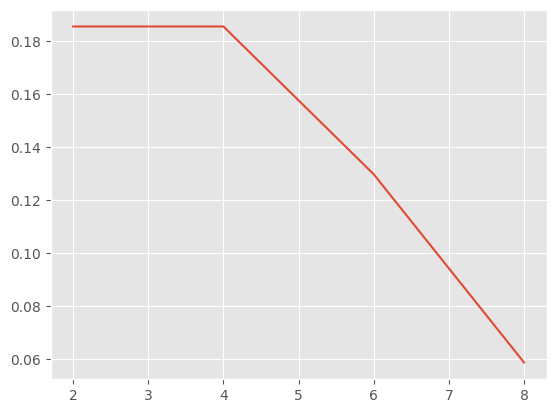

In [137]:
plt.plot(*zip(*count_silhouette))

* No Clear Elbow:
If the inertia plot doesn't show a clear elbow and the inertia decreases smoothly without a significant break point, it might be challenging to determine the optimal k based solely on this method.  
  
* Slight Elbow:
If there's a slight elbow, it suggests that adding more clusters beyond that point provides diminishing returns in terms of explaining the variance in the data.  
  
* Sharp Elbow:
If there's a sharp elbow, it indicates a more pronounced point where the addition of clusters is less beneficial. This is often considered a good candidate for the optimal number of clusters.  

  However, it's important to note that the elbow method has limitations, and the choice of k may not always be entirely clear-cut. It's often used as a heuristic rather than a strict rule. Other factors, such as domain knowledge, the context of the problem, and the specific characteristics of the data, should also be considered.

## Model Output
Now that we've decided on k=4 clusters, let's assign the cluster labels back to the original data, and make it interpretable!

In [123]:
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters4 = km.labels_.tolist()
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: total: 344 ms
Wall time: 259 ms


In [124]:
df2_sample_dummies_concat_cities2_train.loc[:, "cluster_number"] = clusters4

In [125]:
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_8458  group_id_8940  group_id_12542  \
726756           False          False          False           False   
1137106          False          False          False           False   
1138316          False          False          False           False   
256004           False          False          False           False   
540166           False          False          False           False   

         group_id_12907  group_id_14573  group_id_15324  group_id_17921  \
726756            False           False           False           False   
1137106           False           False           False           False   
1138316           False           False           False           False   
256004            False           False           False           False   
540166            False           False           False           False   

         group_id_22211  group_id_25709  ...  group_id_26342343  \
726756            False           False  ...              False   
1137106           False           False  ...              False   
1138316           False           False  ...              False   
256004            False           False  ...              False   
540166            False           False  ...              False   

         group_id_26355546  group_id_26364045  cities__Chicago  \
726756               False              False            False   
1137106              False              False            False   
1138316              False              False            False   
256004               False              False            False   
540166               False              False            False   

         cities__Chicago Heights  cities__New York  cities__San Francisco  \
726756                     False             False                   True   
1137106                    False              True                  False   
1138316                    False              True                  False   
256004                     False              True                  False   
540166                     False              True                  False   

         cities__South San Francisco  cities__West New York  cluster_number  
726756                         False                  False               1  
1137106                        False                  False               0  
1138316                        False                  False               0  
256004                         False                  False               0  
540166                         False                  False               0  

[5 rows x 2774 columns]

In [126]:
df2_sample_dummies_concat_cities2_train["cluster_number"].value_counts()

cluster_number
0    2811
1    1336
3     852
2       1
Name: count, dtype: int64

## Tadah! We have a merged dataframe of members, clustered by their city and groups they're interested in, merged on what the group categories are (from the original groups df) and we can now export this and explore!

In [127]:
df2_sample.head()

member_id                                                bio  \
726756    10913384      I am an entrepreneur, consultant and a biker.   
1137106   14429094                                          not_found   
1138316   14437612                            a guy who likes the web   
256004     4810553                                          not_found   
540166     9002145  I am a Principal at vokse, a boutique business...   

                  city country   hometown               joined    lat  \
726756   San Francisco      us   New York  2013-09-03 21:37:57  37.78   
1137106       New York      us   New York  2017-08-12 17:46:36  40.76   
1138316       New York      us  not_found  2012-03-01 19:47:45  40.72   
256004        New York      us  not_found  2015-06-20 21:19:21  40.72   
540166        New York      us  not_found  2010-12-05 16:19:06  40.76   

                                           link     lon        member_name  \
726756   http://www.meetup.com/members/10913384 -122.42     Fedya Kolyadin   
1137106  http://www.meetup.com/members/14429094  -73.99  Kirill Cherkashin   
1138316  http://www.meetup.com/members/14437612  -74.00     Jacques Dupoux   
256004    http://www.meetup.com/members/4810553  -73.98             Audrey   
540166    http://www.meetup.com/members/9002145  -73.98        Jeff Maglin   

        state member_status              visited  group_id  
726756     CA        active  2017-04-20 05:27:34   4784192  
1137106    NY        active  2017-11-03 00:03:22  25461501  
1138316    NY        active  2014-01-08 15:45:01   2760642  
256004     NY        active  2015-06-22 22:36:36   3454942  
540166     NY        active  2013-10-06 19:11:35    467517

In [128]:
df2_sample.loc[:, "clusters_number"] = clusters4

In [129]:
df2_sample.to_csv('members_cluster_group.csv')

In [130]:
copy members_cluster_group.csv "E:/Master/ADC/14.Machine_Learning/ubb-sociology-ml/Data/"

        1 file(s) copied.


In [131]:
df2_sample.head()

member_id                                                bio  \
726756    10913384      I am an entrepreneur, consultant and a biker.   
1137106   14429094                                          not_found   
1138316   14437612                            a guy who likes the web   
256004     4810553                                          not_found   
540166     9002145  I am a Principal at vokse, a boutique business...   

                  city country   hometown               joined    lat  \
726756   San Francisco      us   New York  2013-09-03 21:37:57  37.78   
1137106       New York      us   New York  2017-08-12 17:46:36  40.76   
1138316       New York      us  not_found  2012-03-01 19:47:45  40.72   
256004        New York      us  not_found  2015-06-20 21:19:21  40.72   
540166        New York      us  not_found  2010-12-05 16:19:06  40.76   

                                           link     lon        member_name  \
726756   http://www.meetup.com/members/10913384 -122.42     Fedya Kolyadin   
1137106  http://www.meetup.com/members/14429094  -73.99  Kirill Cherkashin   
1138316  http://www.meetup.com/members/14437612  -74.00     Jacques Dupoux   
256004    http://www.meetup.com/members/4810553  -73.98             Audrey   
540166    http://www.meetup.com/members/9002145  -73.98        Jeff Maglin   

        state member_status              visited  group_id  clusters_number  
726756     CA        active  2017-04-20 05:27:34   4784192                1  
1137106    NY        active  2017-11-03 00:03:22  25461501                0  
1138316    NY        active  2014-01-08 15:45:01   2760642                0  
256004     NY        active  2015-06-22 22:36:36   3454942                0  
540166     NY        active  2013-10-06 19:11:35    467517                0

In [132]:
df2_sample['city'].nunique()

6

In [133]:
df2_sample['group_id'].nunique()

2767